#LSTM

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0090 - val_loss: 0.0058
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0050 - val_loss: 0.0038
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 12/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0

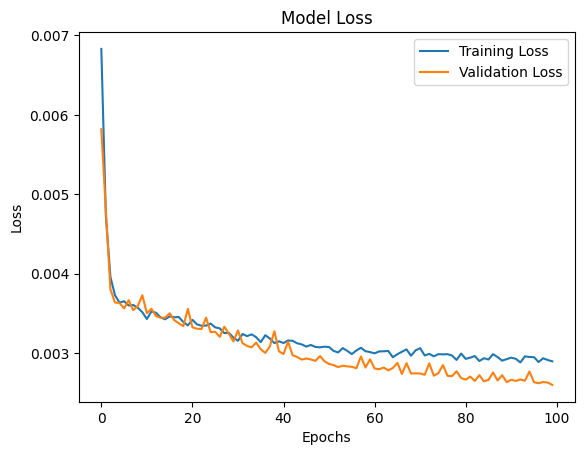

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predictions on new data:  [[18.375309]
 [18.3824  ]
 [18.185701]
 [18.25064 ]
 [18.218176]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load dataset
df = pd.read_csv('/content/pp_dataset.csv')  

# Correct feature and target column names
features = ['Pre-breakfast blood glucose measurement', 'Regular_insulin_Pre-breakfast_blood_glucose',
            'NPH insulin dose', 'Pre-supper blood glucose measurement', 'Day', 'Month', 'Year']
target = 'Regular insulin dose'

# Preprocess data
X = df[features].values
y = df[target].values

# Feature scaling for X and y separately
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Reshape input for LSTM [samples, timesteps, features]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_train_scaled = model.predict(X_train)
y_pred_test_scaled = model.predict(X_test)

# Rescale predictions back to original scale
y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled)
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled)

# Rescale true y values back to original scale
y_train_orig = scaler_y.inverse_transform(y_train)
y_test_orig = scaler_y.inverse_transform(y_test)

# Evaluate model
train_mse = mean_squared_error(y_train_orig, y_pred_train)
test_mse = mean_squared_error(y_test_orig, y_pred_test)
train_r2 = r2_score(y_train_orig, y_pred_train)
test_r2 = r2_score(y_test_orig, y_pred_test)

print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')
print(f'Training R^2: {train_r2}')
print(f'Testing R^2: {test_r2}')

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Load new data 
new_data = pd.read_csv('/content/new_data.csv')
new_data_scaled = scaler_X.transform(new_data[features])
new_data_scaled = new_data_scaled.reshape((new_data_scaled.shape[0], 1, new_data_scaled.shape[1]))

# Predict on new data
new_predictions_scaled = model.predict(new_data_scaled)
new_predictions = scaler_y.inverse_transform(new_predictions_scaled)

# Output predictions
print("Predictions on new data: ", new_predictions)


#GRU

In [ ]:
!pip install tensorflow


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0157 - val_loss: 0.0053
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - val_loss: 0.0041
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0051 - val_loss: 0.0040
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0038 - va

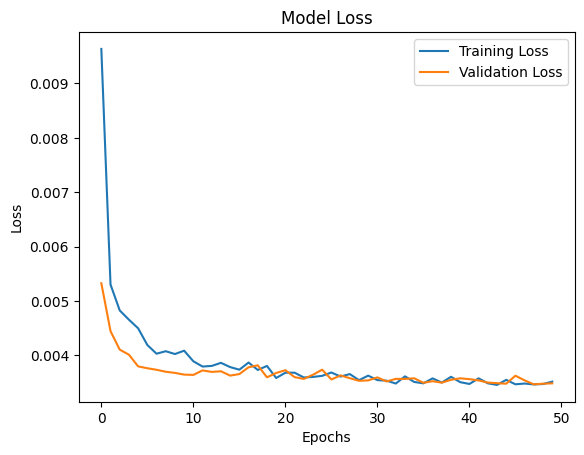

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predictions on new data:  [[15.134872]
 [15.073548]
 [15.01025 ]
 [15.085725]
 [15.115594]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
df = pd.read_csv('/content/pp_dataset.csv')

# Correct feature and target column names
features = ['Pre-breakfast blood glucose measurement', 'Regular_insulin_Pre-breakfast_blood_glucose',
            'NPH insulin dose', 'Pre-supper blood glucose measurement', 'Day', 'Month', 'Year']

if 'Insulin Sensitivity Factor' in df.columns and 'Carbohydrate Intake' in df.columns:
    features += ['Insulin Sensitivity Factor', 'Carbohydrate Intake']

target = 'Regular insulin dose'

# Preprocess data
X = df[features].values
y = df[target].values

scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Function to create the model
def create_model(units=64, dropout_rate=0.2, learning_rate=0.0003):
    model = Sequential()
    model.add(GRU(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(GRU(units=units // 2, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Set parameters for grid search manually
params = {
    'units': 64,  
    'dropout_rate': 0.2,
    'learning_rate': 0.0003,
    'epochs': 50,
    'batch_size': 32
}

# Create the model
model = create_model(units=params['units'], dropout_rate=params['dropout_rate'], learning_rate=params['learning_rate'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'],
                    validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Make predictions
y_pred_train_scaled = model.predict(X_train)
y_pred_test_scaled = model.predict(X_test)

# Rescale predictions back to original scale
y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled)
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled)

# Rescale true y values back to original scale
y_train_orig = scaler_y.inverse_transform(y_train)
y_test_orig = scaler_y.inverse_transform(y_test)

# Evaluate model
train_mse = mean_squared_error(y_train_orig, y_pred_train)
test_mse = mean_squared_error(y_test_orig, y_pred_test)
train_r2 = r2_score(y_train_orig, y_pred_train)
test_r2 = r2_score(y_test_orig, y_pred_test)

print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')
print(f'Training R^2: {train_r2}')
print(f'Testing R^2: {test_r2}')

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Load new data
new_data = pd.read_csv('/content/new_data.csv')
new_data_scaled = scaler_X.transform(new_data[features])
new_data_scaled = new_data_scaled.reshape((new_data_scaled.shape[0], 1, new_data_scaled.shape[1]))

# Predict on new data
new_predictions_scaled = model.predict(new_data_scaled)
new_predictions = scaler_y.inverse_transform(new_predictions_scaled)

# Output predictions
print("Predictions on new data: ", new_predictions)


##ENSEMBLE METHOD OF LSTM&GRU

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_36            │ (None, 1, 7)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_36 (LSTM)            │ (None, 64)             │         18,432 │ input_layer_36[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_35 (GRU)              │ (None, 64)             │         14,016 │ input_layer_36[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_35            │ (None, 128)            │              0 │ lstm_36[0][0],         │
│ (Concatenate)             │                        │                │ gru_35[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_104 (Dense)         │ (None, 64)             │          8,256 │ concatenate_35[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_105 (Dense)         │ (None, 1)              │             65 │ dense_104[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 40,769 (159.25 KB)

 Trainable params: 40,769 (159.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0056 - mae: 0.0559 - val_loss: 0.0037 - val_mae: 0.0444
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0032 - mae: 0.0413 - val_loss: 0.0036 - val_mae: 0.0441
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0035 - mae: 0.0416 - val_loss: 0.0034 - val_mae: 0.0445
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mae: 0.0439 - val_loss: 0.0032 - val_mae: 0.0412
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - mae: 0.0396 - val_loss: 0.0030 - val_mae: 0.0413
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 - mae: 0.0399 - val_loss: 0.0030 - val_mae: 0.0403
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0028 - mae: 0.0395 - val_loss: 0.0027 - val_mae: 0.0392
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027 - mae: 0.0371 - val_loss: 0.0030 - val_mae: 0.0426
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.00

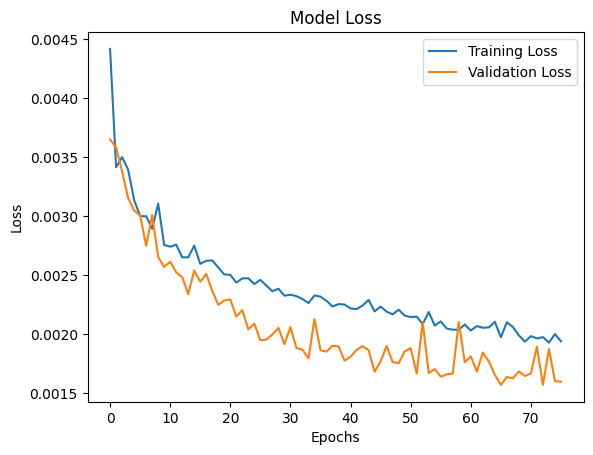

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predictions on new data:  [[58.958164]
 [45.676014]
 [22.586903]
 [14.209532]
 [48.303833]
 [19.190422]
 [16.535257]
 [49.875954]
 [12.446873]
 [16.729124]
 [43.938267]
 [25.623764]
 [51.908485]
 [20.47164 ]
 [62.76756 ]
 [51.59961 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Concatenate, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
df = pd.read_csv('/content/pp_dataset.csv')

# Correct feature and target column names
features = ['Pre-breakfast blood glucose measurement', 'Regular_insulin_Pre-breakfast_blood_glucose',
            'NPH insulin dose', 'Pre-supper blood glucose measurement', 'Day', 'Month', 'Year']
target = 'Regular insulin dose'

# Preprocess data
X = df[features].values
y = df[target].values

scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Input layer
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# LSTM branch
lstm_layer = LSTM(64, return_sequences=False)(input_layer)

# GRU branch
gru_layer = GRU(64, return_sequences=False)(input_layer)

# Combine LSTM and GRU outputs
merged = Concatenate()([lstm_layer, gru_layer])

# Fully connected layer
dense_layer = Dense(64, activation='relu')(merged)
output_layer = Dense(1)(dense_layer)  # For regression task

# Define the ensemble model
ensemble_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
ensemble_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Summary
ensemble_model.summary()

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = ensemble_model.fit(X_train, y_train, epochs=100, batch_size=32,
                              validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Make predictions
y_pred_train_scaled = ensemble_model.predict(X_train)
y_pred_test_scaled = ensemble_model.predict(X_test)

# Rescale predictions back to original scale
y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled)
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled)

# Rescale true y values back to original scale
y_train_orig = scaler_y.inverse_transform(y_train)
y_test_orig = scaler_y.inverse_transform(y_test)

# Evaluate model
train_mse = mean_squared_error(y_train_orig, y_pred_train)
test_mse = mean_squared_error(y_test_orig, y_pred_test)
train_r2 = r2_score(y_train_orig, y_pred_train)
test_r2 = r2_score(y_test_orig, y_pred_test)

print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')
print(f'Training R^2: {train_r2}')
print(f'Testing R^2: {test_r2}')

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Load new data 
new_data = pd.read_csv('/content/unseen_data.csv')
new_data_scaled = scaler_X.transform(new_data[features])
new_data_scaled = new_data_scaled.reshape((new_data_scaled.shape[0], 1, new_data_scaled.shape[1]))

# Predict on new data
new_predictions_scaled = ensemble_model.predict(new_data_scaled)
new_predictions = scaler_y.inverse_transform(new_predictions_scaled)

# Output predictions
print("Predictions on new data: ", new_predictions)
